In [1]:
from utils import *

from itertools import count
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as clr
import pandas as pd
import numpy as np

In [2]:
def low_freq_var(D,w):
    '''identify if low frequency variants appear within the reduced tree'''
    terminal_nodes = [n for n,d in D.out_degree() if d==0]
    weights = [n for n,k in D.nodes(data=True) if k['weight']<w]
    low_freq = list(set(terminal_nodes) & set(weights))
    if len(low_freq) == 0: 
        return False, low_freq
    else:
        return True, low_freq

In [3]:
def inter_homoplasy3(D,p): 
    '''check if homoplasy occurs between lineages'''
    l1 = [a for path in p[0] for a in path]
    l2 = [a for path in p[1] for a in path]
    amino_acids = list(set(l1) & set(l2))
    if not list(set(l1) & set(l2)): 
        return False
    else:
        if (l1[0]==l2[0]) & (len(amino_acids)==1): 
            return False
        elif (l1[0]!=l2[0]) & ((len(set(l1))==1) | (len(set(l1))==1)): #remove autapomorphy
            return False
        else:
            return True

In [4]:
sites = [84]

# input
sites = [42, 44, 76, 95, 146, 160, 171, 262, 347, 389, 409, 427, 432, 487, 544, 593, 635, 691, 731, 739, 748, 757, 839,
         871, 873, 891, 902, 906, 909, 920, 923, 926, 928, 931, 933, 935, 936, 937, 941, 942, 945, 948, 956, 957, 973, 983, 
         985, 987, 995, 999, 1001, 1005, 1007, 1012, 1125, 1147, 1151, 1154, 1172, 1174, 1176, 1181, 1183, 1190, 1199, 1201, 
         1202, 1203, 1204, 1226, 1236, 1241, 1271, 1280, 1287, 1305, 1332, 1337, 1360, 1363, 1365, 1374, 1384, 1389, 1392, 
         1396, 1401, 1403, 1406, 1411, 1418, 1420, 1422, 1423, 1429, 1478, 1513, 1516, 1541, 1544, 1558, 1575, 1585, 1588, 
         1606, 1621, 1641, 1674, 1700, 1733, 1735, 1769, 1833, 1852, 1861, 1876, 1886, 1916, 1926, 1934, 1951, 1953, 1955, 
         1961, 1964, 1968, 1976, 1988, 2008, 2012, 2022, 2026, 2029, 2043, 2078, 2085, 2088, 2100, 2103, 2107, 2114, 2118, 
         2125, 2127, 2132, 2137, 2146, 2167, 2184, 2192, 2196, 2202, 2205, 2209, 2219, 2255, 2275, 2276, 2278, 2281, 2285, 
         2288, 2299, 2307, 2324, 2326, 2339, 2342, 2344, 2348, 2357, 2361, 2362, 2364, 2374, 2382, 2388, 2400, 2414, 2415, 
         2419, 2420, 2440, 2441, 2442, 2445, 2446, 2472, 2474, 2476, 2482, 2484, 2485, 2486, 2488, 2491, 2507, 2510, 2517, 
         2520, 2533, 2536, 2537, 2547, 2548, 2569, 2571, 2572, 2582, 2602, 2604, 2609, 2631, 2648, 2653, 2674, 2711, 2715, 
         2765, 2770, 2772, 2795, 2821, 2830, 2833, 2854, 2858, 2867, 2870, 2879, 2888, 2894, 2900, 2901, 2903, 2905, 2906, 
         2910, 2917, 2931, 2938, 2940, 2945, 2947, 2981, 2986, 2988, 2989, 2990, 2997, 3001, 3005, 3039, 3047, 3049, 3050, 
         3058, 3060, 3071, 3073, 3075, 3076, 3080, 3092, 3100, 3124, 3140, 3144, 3155, 3182, 3192, 3193, 3203, 3210, 3228, 
         3243, 3244, 3274, 3282, 3294, 3296, 3302, 3305, 3313, 3317, 3318, 3326, 3338, 3351, 3359, 3369, 3378, 3381, 3407, 
         3410, 3411, 3414, 3416, 3460, 3489, 3490, 3512, 3513, 3534, 3537, 3538, 3550, 3556, 3563, 3572, 3575, 3577, 3616, 
         3638, 3646, 3666, 3669, 3686, 3691, 3692, 3724, 3725, 3731, 3732, 3733, 3745, 3766, 3767, 3769, 3778, 3779, 3792, 
         3794, 3804, 3809, 3832, 3834, 3836, 3857, 3858, 3861, 3866, 3874, 3881, 3892, 3897, 3905, 3912, 3922, 3980, 3987, 
         3988, 4007, 4016, 4018, 4019, 4022, 4046, 4091, 4101, 4103, 4107, 4121, 4166, 4167, 4174, 4184, 4187, 4190, 4208, 
         4217, 4220, 4237, 4248, 4249, 4267, 4281, 4305, 4350, 4372, 4417, 4419, 4455, 4460, 4518, 4523, 4559, 4566, 4594, 
         4595, 4597, 4609, 4617, 4652, 4668, 4688, 4701, 4723, 4727, 4728, 4736, 4755, 4845, 4860, 4882, 4920, 4933, 4970, 
         4973, 4993, 5011, 5025, 5031, 5079, 5108, 5147, 5160, 5180, 5183, 5196, 5247, 5254, 5273, 5279, 5282, 5300, 5301, 
         5308, 5314, 5320, 5333, 5339, 5340, 5344, 5387, 5395, 5414, 5456, 5457, 5483, 5485, 5486, 5500, 5501, 5502, 5528, 
         5532, 5559, 5585, 5617, 5624, 5625, 5629, 5631, 5634, 5645, 5665, 5668, 5669, 5673, 5681, 5683, 5685, 5687, 5693, 
         5702, 5703, 5713, 5729, 5733, 5749, 5751, 5762, 5765, 5770, 5816, 5819, 5822, 5853, 5874, 5876, 5877, 5884, 5885, 
         5894, 5897, 5909, 5922, 5923, 5927, 5930, 5938, 5944, 5947, 5951, 5955, 5959, 5960, 5964, 5970, 5982, 5983, 5990, 
         6014, 6025, 6032, 6033, 6039, 6042, 6046, 6048, 6049, 6057, 6061, 6066, 6077, 6083, 6085, 6086, 6096, 6104, 6105, 
         6147, 6149, 6152, 6154, 6162, 6164, 6166, 6170, 6210, 6211, 6212, 6219, 6220, 6234, 6244, 6253, 6265, 6273, 6275, 
         6293, 6318, 6323, 6336, 6338, 6339, 6352, 6364, 6374, 6377, 6380, 6381, 6392, 6410, 6411, 6418, 6467, 6471, 6477, 
         6493, 6496, 6500, 6505, 6507, 6514, 6527, 6530, 6534, 6536, 6537, 6543, 6544, 6553, 6560, 6561, 6567, 6583, 6588, 
         6592, 6594, 6597, 6602, 6605, 6609, 6615, 6619, 6620, 6621, 6622, 6624, 6639, 6671, 6675, 6688, 6689, 6690, 6695, 
         6704, 6715, 6716, 6717, 6725, 6736, 6738, 6752, 6753, 6763, 6765, 6767, 6769, 6770, 6777, 6790, 6791, 6793, 6794, 
         6795, 6797, 6798, 6799, 6800, 6809, 6814, 6817, 6818, 6820, 6822, 6825, 6828, 6833, 6836, 6842, 6843, 6845, 6852, 
         6854, 6857, 6859, 6860, 6861, 6862, 6863, 6866, 6871, 6877, 6882, 6883, 6885, 6891, 6893, 6894, 6903, 6910, 6911, 
         6919, 6921, 6925, 6930, 6933, 6934, 6942, 6945, 6958, 6964, 6965, 6985, 6988, 6992, 6997, 6998, 7001, 7012, 7013, 
         7014, 7018, 7019, 7020, 7023, 7024, 7026, 7056, 7059, 7060, 7061, 7062, 7064, 7086, 7088, 7090, 7132, 7133, 7135, 
         7146, 7154, 7156, 7158, 7160, 7163, 7165, 7173, 7174, 7177, 7181, 7185, 7192, 7203, 7207, 7225, 7230, 7231, 7234, 
         7240, 7243, 7246, 7247, 7248, 7249, 7254, 7264, 7265, 7266, 7267, 7287, 7290, 7294, 7299, 7300, 7303, 7306, 7307, 
         7308, 7314, 7315, 7318, 7320, 7321, 7322, 7323, 7324, 7329, 7338, 7355, 7357, 7359, 7361, 7367, 7374, 7375, 7384, 
         7393, 7398, 7402, 7405, 7409, 7411, 7412, 7423, 7435, 7436, 7437, 7439, 7444, 7445, 7449, 7454, 7455, 7464, 7465, 
         7467, 7488, 7500, 7511, 7519, 7557, 7561, 7564, 7571, 7575, 7585, 7586, 7594, 7598, 7601, 7615, 7621, 7623, 7642, 
         7644, 7646, 7658, 7659, 7660, 7661, 7670, 7675, 7686, 7693, 7701, 7702, 7706, 7708, 7710, 7714, 7715, 7717, 7719, 
         7730, 7733, 7736, 7743, 7748, 7752, 7764, 7780, 7781, 7782, 7789, 7794, 7813, 7814, 7816, 7820]

In [1]:
%%time

#main algorithm
k=len(sites)
j=0
data = np.empty([k, 5])

for site in sites:
    tree_path = f"data/batch1/HumanBeta_Site{site}.tree" ### python 3.6+
    tree = Phylo.read(tree_path, "nexus")
    # preprocessing
    collapse_tips(tree)
    add_names(tree)
    state_collapse(tree,2) 
    # to digraph 
    D = phylo_to_digraph(tree)
    x,e = low_freq_var(D,3)
    if x == 1:
        D.remove_nodes_from(e)
    c = conserved(D)
    if c == False:
        l = list(D.successors('0')) # find ancestors for each lineage
        p1 = all_states_paths(D,[l[0]]) # find paths by lineage
        p2 = all_states_paths(D,[l[1]]) # find paths by lineage
        p = [p1,p2]
        h1 = inter_homoplasy3(D,p)
        h2 = intra_homoplasy2(D,p)
        s = stepwise2(D,p)
    data[j] = [x,c,h1,h2,s]
    j = j+1
            

NameError: name 'sites' is not defined

In [2]:
data

NameError: name 'data' is not defined

In [ ]:
  
#results to dataframe and save to csv
df = pd.DataFrame(data=data, index=sites)
df.to_csv(r'lfv.csv', header = False)

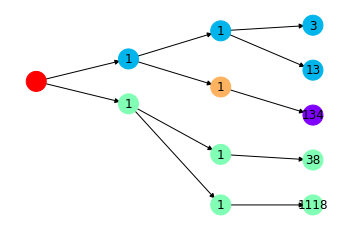

In [12]:
## dibujar tambien digrafica


from itertools import count
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as clr


nodes = D.nodes()

# get unique groups
groups = set(nx.get_node_attributes(D,'comment').values())
c_mapping = dict(zip(sorted(groups),count()))
colors = [c_mapping[D.nodes[n]['comment']] for n in nodes if n!='0']
c = max(colors)+1
colors.append(c)

pos = graphviz_layout(D, prog='dot')  # positions for all nodes
new_pos = {n:(-q,p) for n,(p,q) in pos.items()}
pos = new_pos

nx.draw_networkx_nodes(D, pos, nodelist=nodes, node_color=colors, node_size=400, cmap = plt.cm.get_cmap('rainbow'))

nx.draw_networkx_edges(D, pos)

labels = {n: D.nodes[n]['weight'] for n in nodes if n!='0'}
nx.draw_networkx_labels(D, pos, labels=labels)

plt.gca().invert_yaxis()
plt.axis("off")
plt.show() 